<a href="https://colab.research.google.com/github/Dharungit/ML_Projects/blob/main/Random_Forest_Assignment_Dharun_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error,mean_squared_error


# Random Forest **Classification**

In [ ]:
tit = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
le_sex, le_age = LabelEncoder(), LabelEncoder()

In [ ]:
tit['Sex_n'] = le_sex.fit_transform(tit['Sex'])
tit['Age_n'] = le_sex.fit_transform(tit['Age'])
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n,Age_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,28
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,34
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,47
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,35
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,24
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,90
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,34


In [ ]:
tit = tit.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex','Age'],axis=1)
tit.head()

,Survived,Pclass,Fare,Sex_n,Age_n
0,0,3,7.2500,1,28
1,1,1,71.2833,0,51
2,1,3,7.9250,0,34
3,1,1,53.1000,0,47
4,0,3,8.0500,1,47


In [ ]:
x = tit[['Pclass','Sex_n','Age_n','Fare']]
y = tit['Survived']

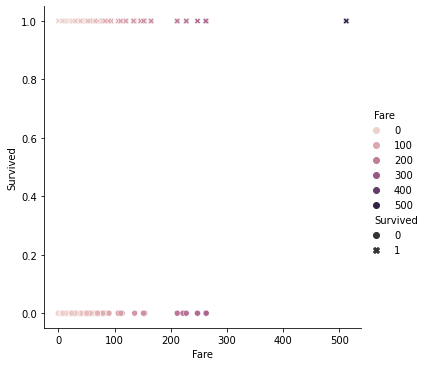

In [ ]:
sns.relplot(x='Fare', y='Survived',hue='Fare',style='Survived', data=tit)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape

(712, 4)

In [ ]:
y_train.shape

(712,)

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

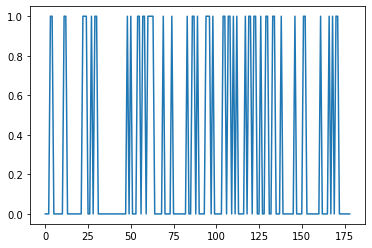

In [ ]:
plt.plot(y_pred)

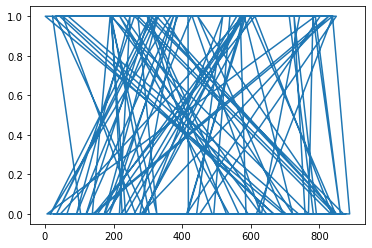

In [ ]:
plt.plot(y_test)

In [ ]:
#Accuracy Score
accuracy_score(y_test,y_pred)*100

83.79888268156425

In [ ]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       117
           1       0.80      0.71      0.75        62

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



# Random Forest **Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [ ]:
bos = load_boston()

In [ ]:
x = bos.data
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
y = bos.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

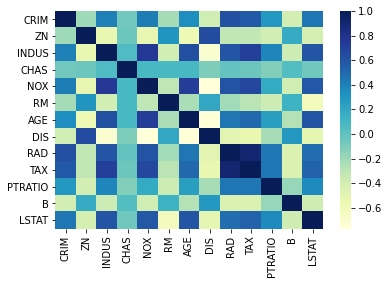

In [ ]:
boston_pd = pd.DataFrame(bos.data, columns = bos.feature_names)
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape

(404, 13)

In [ ]:
x_test.shape

(102, 13)

In [ ]:
y_train.shape

(404,)

In [ ]:
y_test.shape

(102,)

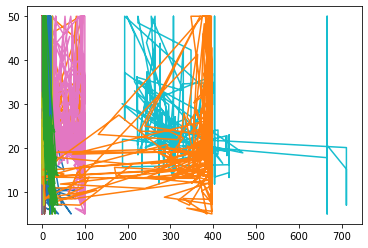

In [ ]:
plt.plot(x,y)

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([24.73 , 31.185, 25.95 , 29.195, 17.6  , 15.515, 45.695, 14.87 ,
       20.875, 46.55 , 20.11 , 26.055, 23.61 , 35.81 , 33.005, 41.28 ,
       24.64 , 20.965, 21.875, 16.505, 31.64 , 15.17 , 21.42 , 23.68 ,
       35.965, 19.07 , 19.055, 15.475, 45.   , 12.355, 31.695, 30.5  ,
       24.85 , 24.675, 16.985, 19.845,  9.05 , 35.325, 23.845, 21.915,
       43.515, 24.23 , 11.34 , 28.985, 20.4  , 27.065, 20.075, 19.535,
       48.12 , 16.55 , 19.875, 14.21 , 21.19 , 44.835, 27.745, 32.91 ,
       20.215, 19.805, 20.82 , 30.825, 19.715, 20.695, 46.5  , 42.04 ,
       24.91 , 15.455, 23.89 ,  9.055, 27.825, 39.04 , 16.02 , 26.14 ,
       19.16 , 40.025, 24.935, 18.21 , 39.795,  9.495, 19.35 , 32.01 ,
       19.885, 23.34 , 19.315, 24.52 , 33.05 , 31.05 , 22.965, 32.29 ,
       26.01 ,  8.2  , 25.89 , 18.69 , 23.2  , 23.565, 19.58 , 18.85 ,
       24.735, 20.4  , 20.85 , 20.315, 22.81 , 20.945])

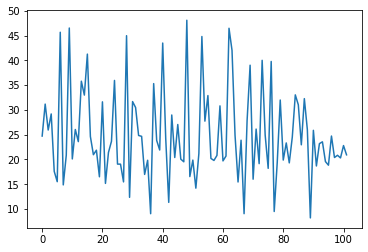

In [ ]:
plt.plot(y_pred)

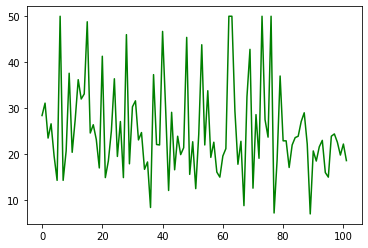

In [ ]:
plt.plot(y_test,c='green')

In [ ]:
#Mean Absolute Error
print(mean_absolute_error(y_test, y_pred))

2.892647058823529


In [ ]:
#Mean Squared Error:
print(mean_squared_error(y_test, y_pred))

17.106394117647056
